# Notebook donde se desarrolla el entrenamiento local con una parte de los datos

**Cargar las librerias**

In [64]:
import sys

if ".." not in sys.path:
    sys.path.append("..")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Cargar los datos**


In [67]:
#df = pd.read_csv('local_data_fold_0.csv')
# Transformar a un numpy aarray
#data = df.to_numpy()
# Cargar archivo numpy
x_local = np.load('x_train_fold_0.npy')
y_local = np.load('y_train_fold_0.npy')
# Juntar los datos de entrada y salida usando numpy

x_local.shape, y_local.shape


((12000, 28, 28, 1), (12000,))

In [54]:

# Cargar los datos de prueba
test_data = np.load('mnist_test.npz')
# Descromprimir los datos de prueba
x_test = test_data['x_test']
y_test = test_data['y_test']

<Sequential name=sequential_3, built=True>
Epoch 1/5


d:\claseCloud\federated-models\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7472 - loss: 0.7971 - val_accuracy: 0.9684 - val_loss: 0.1047
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9701 - loss: 0.1046 - val_accuracy: 0.9760 - val_loss: 0.0780
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9799 - loss: 0.0621 - val_accuracy: 0.9729 - val_loss: 0.0858
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9867 - loss: 0.0443 - val_accuracy: 0.9792 - val_loss: 0.0650
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9903 - loss: 0.0332 - val_accuracy: 0.9785 - val_loss: 0.0720
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.95      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.99      0.99       982
    

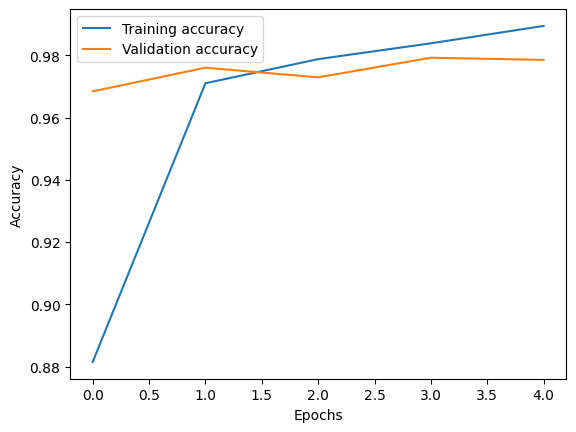

In [68]:
from sklearn.metrics import classification_report
from src.model import build
def train_and_verify(local_model, x_local, y_local, epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(x_local, y_local, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)

# Entrenamientos locales. Cada uno de estos deben hacerse en computadoras aparte.
from tqdm import tqdm

local_model = build.build_it()
train_and_verify(local_model, x_local, y_local, 5, x_test, y_test, f"lmodel_{1}.keras")

In [27]:
local_data[0][0]

'[[[0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]]\n\n [[0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]]\n\n [[0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n 